Program Runing in Colabs 

In [1]:
import cv2
import time
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt


######### Make replicable the results
seed_value=42

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)




#xs = np.load('/content/drive/MyDrive/ML-Data/xs.npy')
##model.save('model.h5')

Basic funtions

In [2]:
def read_and_resize_image(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result
  
def showInRow(list_of_images, titles = None, disable_ticks = False):
  plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()
  
def show_in_column(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  # set inline plots size
  plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
  for idx in range(count):
    subplot = plt.subplot(count, 1, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

def creatingList1sInFolder(NameDirectoriy):
    List1 = os.listdir(NameDirectoriy)
    ListFull = list()
    
    for entry in List1:
        FilePath = os.path.join(NameDirectoriy, entry)
        if os.path.isdir(FilePath):
            ListFull = ListFull + creatingList1sInFolder(FilePath)
        else:
            ListFull.append(FilePath)
                
    return ListFull


#Importing Databeses from Drive

Mount google drive to colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dir='/content/drive/MyDrive/CV-Data/'
entries = os.listdir(dir)
print(entries)
print("DataBases: "+str(len(entries))) #4 Databases uploaded to myDrive

['Casia2Device1', 'CASIA Iris Image Database (version 1.0)', 'Casia2Device2', 'IITD_database']
DataBases: 4


In [5]:
ListPathImages = list()
for i in entries:
  dir_i=os.path.join(dir,i)
  ListPathImages.append(creatingList1sInFolder(dir_i))

#ListPathImages= creatingList1sInFolder('/content/drive/MyDrive/CV-Data/')
print(ListPathImages)

#5409 Images in bmp format, 4 Databases
j=0
for i in ListPathImages:
  print ("Data base len: "+str(len(i)) )
  j=j+len(i)
print("Total Images: "+str(j))

[['/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_000.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_001.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_002.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_004.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_003.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_006.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_005.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_009.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_008.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_007.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_010.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_011.bmp', '/content/drive/MyDrive/CV-Data/Casia2Device1/device1/0001/0001_012.bmp', '/content/drive/MyDrive/CV-Data/Casi

31
31
31
31


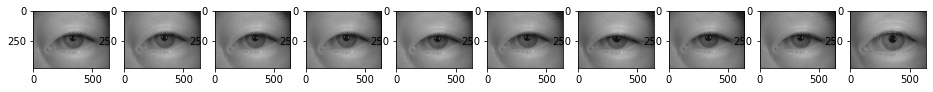

(480, 640)


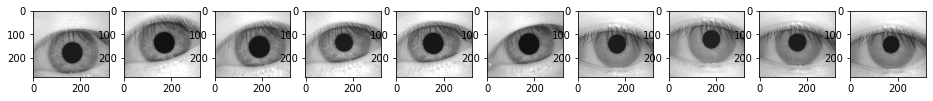

(280, 320)


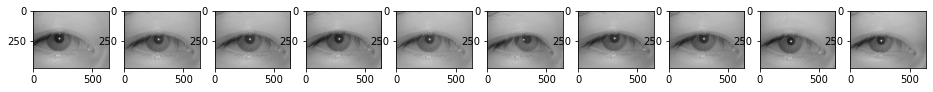

(480, 640)


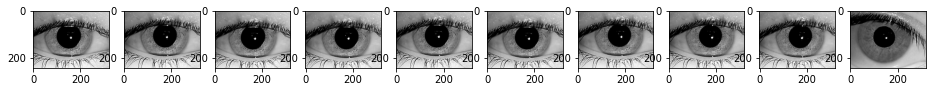

(240, 320)


In [6]:
# Read some Images, and visualize
ListImages = list()
for database in ListPathImages:
  ListImageDatabase = list()
  index=0
  for img_bmp in database:
    try:
      img = cv2.imread(img_bmp, 0)
      ListImageDatabase.append(img)
    except:
      print("An exception occurred")
    if index > 30:
        break 
    index = index + 1 
  print(index)
    
  ListImages.append(ListImageDatabase)


#Visualize some images. 
index =1  #17
showInRow(ListImages[0][index:(index +10)]) 
print(ListImages[0][index].shape)
showInRow(ListImages[1][index:(index +10)])
print(ListImages[1][index].shape)
showInRow(ListImages[2][index:(index +10)])
print(ListImages[2][index].shape)
showInRow(ListImages[3][index:(index +10)])
print(ListImages[3][index].shape)


##Stylegen2 in colab

Creating a folder for Stylegen2 in colab

In [41]:
#!!! This section create a folder in google drive, just run one time
%cd /content/drive/MyDrive/
!mkdir stylegan2-colab   #name of the folder
%cd stylegan2-colab/
!git clone https://github.com/dvschultz/stylegan2 #https://github.com/NVlabs/stylegan2.git  
%cd stylegan2
!mkdir pkl
%cd pkl
!gdown --id 1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF #https://drive.google.com/open?id=1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF
%cd ../
!mkdir results
!mkdir results/00001-pretrained    #pre+trained model clone to result folder
%cd results/00001-pretrained
!gdown --id 1UlDmJVLLnBD9SnLSMXeiZRO6g-OMQCA_
!mv stylegan2-ffhq-config-f.pkl network-snapshot-10000.pkl

%cd /content/drive/MyDrive/stylegan2-colab/stylegan2
%mkdir datasets

/content/drive/MyDrive
mkdir: cannot create directory ‘stylegan2-colab’: File exists
/content/drive/MyDrive/stylegan2-colab
fatal: destination path 'stylegan2' already exists and is not an empty directory.
/content/drive/My Drive/stylegan2-colab/stylegan2
/content/drive/My Drive/stylegan2-colab/stylegan2/pkl
Downloading...
From: https://drive.google.com/uc?id=1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF
To: /content/drive/My Drive/stylegan2-colab/stylegan2/pkl/inception_v3_features.pkl
87.3MB [00:00, 107MB/s] 
/content/drive/My Drive/stylegan2-colab/stylegan2
mkdir: cannot create directory ‘results’: File exists
/content/drive/My Drive/stylegan2-colab/stylegan2/results/00001-pretrained
Downloading...
From: https://drive.google.com/uc?id=1UlDmJVLLnBD9SnLSMXeiZRO6g-OMQCA_
To: /content/drive/My Drive/stylegan2-colab/stylegan2/results/00001-pretrained/stylegan2-ffhq-config-f.pkl
382MB [00:02, 151MB/s]
/content/drive/MyDrive/stylegan2-colab/stylegan2
mkdir: cannot create directory ‘datasets’: File exi

In [30]:
#up to date stylegan 2 if you have a this folder created
%cd /content/drive/MyDrive/stylegan2-colab/stylegan2
!git pull

/content/drive/MyDrive/stylegan2-colab/stylegan2
Already up to date.


In [9]:
%tensorflow_version 1.x    # Tensorflow 1.15 is set

#import tensorflow as tf
#tf.random.set_seed(seed_value)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x    # Tensorflow 1.15 is set`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


#Dataset comvertion from BPM to JPEG to tfrecords

create folder for the dataset in stylegan2 folder

In [37]:
%cd /content/drive/MyDrive/stylegan2-colab/stylegan2
!mkdir Iris_JPEG   #create folder for the dataset in stylegan2 folder


/content/drive/MyDrive/stylegan2-colab/stylegan2
mkdir: cannot create directory ‘Iris_JPEG’: File exists


Comver to JPEG

In [38]:
directory='/content/drive/MyDrive/stylegan2-colab/stylegan2/Iris_JPEG'

from PIL import Image
index1=1
for database in ListPathImages:
  index=1
  for img_bmp in database:
    try:
      img = Image.open(img_bmp)
      new_img = img.resize( (128, 128) )  #resize image
      nameImg = "image"+str(index1)+"_"+str(index)+".JPEG"
      dir_image=os.path.join(directory,nameImg)
      new_img.save( dir_image, 'JPEG')
    except:
      print("An exception occurred")
    index = index + 1
    if index > 500:
        break     
  print(index) 
  index1 = index1+1

An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
501
501
501
501


Comvert to tfrecords

In [39]:
%cd /content/drive/MyDrive/stylegan2-colab/stylegan2/
#python dataset_tool.py create_from_images datasets/LOCATION_TO_SAVE_TF_RECORDS ./NAME_OF_YOUR_DATASET_DIRECTORY
!python dataset_tool.py create_from_images ./datasets/Iris_tf /content/drive/MyDrive/stylegan2-colab/stylegan2/Iris_JPEG

/content/drive/MyDrive/stylegan2-colab/stylegan2
Loading images from "/content/drive/MyDrive/stylegan2-colab/stylegan2/Iris_JPEG"
  0% 0/1992 [00:00<?, ?it/s]dataset_tool.py:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
100% 1992/1992 [00:13<00:00, 149.71it/s]


#Training Stylegen2

In [43]:
!python run_training.py --num-gpus=1 --data-dir=./datasets --config=config-f --dataset=Iris_tf  --metrics=None

Local submit - run_dir: results/00003-stylegan2-Iris_tf-1gpu-config-f
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
tcmalloc: large alloc 4294967296 bytes == 0x5573e40d8000 @  0x7f82f80f1001 0x7f82f4bd554f 0x7f82f4c25b58 0x7f82f4c29b17 0x7f82f4cc8203 0x5573dc26d0e4 0x5573dc26cde0 0x5573dc2e16f5 0x5573dc2dbe0d 0x5573dc26f02c 0x5573dc2afd39 0x5573dc2acc84 0x5573dc26f231 0x5573dc2de1e6 0x5573dc2dbb0e 0x5573dc1ade2b 0x5573dc2de1e6 0x5573dc2dbb0e 0x5573dc1ade2b 0x5573dc2de1e6 0x5573dc26e69a 0x5573dc2dca45 0x5573dc26e69a 0x5573dc2dcc9e 0x5573dc2dbb0e 0x5573dc1ade2b 0x5573dc2de1e6 0x5573dc2dbb0e 0x5573dc1ade2b 0x5573dc2de1e6 0x5573dc26e69a
tcmalloc: large alloc 4294967296 bytes == 0x5574e40d8000 @  0x7f82f80ef1e7 0x7f82f4bd546e 0x7f82f4c25c7b 0x7f82f4c2635f 0x7f82f4cc8103 0x5573dc26d0e4 0x5573dc26cde0 0x5573dc2e16f5 0x5573dc2dbb0e 0x5573dc26e77a 0x5573dc2dd86a 0x5573dc2dbb0e 0x5573dc26e77a 0x5573dc2dd86a 0x5573d